In [1]:
!pip install kaggle -q

In [2]:

import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [4]:

kaggle_config = json.load(open("/kaggle/input/kaggle-json/kaggle.json"))  

In [5]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [6]:
# Set the environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']
     

In [7]:
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0


In [11]:
!ls

spotify-million-song-dataset.zip  spotify_millsongdata.csv


In [12]:


with zipfile.ZipFile('spotify-million-song-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [14]:
# loading the dataset to a pandas dataframe
df = pd.read_csv("spotify_millsongdata.csv")
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [15]:
df.shape

(57650, 4)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [17]:
df.describe

<bound method NDFrame.describe of              artist                   song  \
0              ABBA  Ahe's My Kind Of Girl   
1              ABBA       Andante, Andante   
2              ABBA         As Good As New   
3              ABBA                   Bang   
4              ABBA       Bang-A-Boomerang   
...             ...                    ...   
57645  Ziggy Marley          Good Old Days   
57646  Ziggy Marley          Hand To Mouth   
57647          Zwan           Come With Me   
57648          Zwan                 Desire   
57649          Zwan              Heartsong   

                                              link  \
0       /a/abba/ahes+my+kind+of+girl_20598417.html   
1            /a/abba/andante+andante_20002708.html   
2             /a/abba/as+good+as+new_20003033.html   
3                       /a/abba/bang_20598415.html   
4           /a/abba/bang+a+boomerang_20002668.html   
...                                            ...   
57645  /z/ziggy+marley/good+old+day

In [18]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [20]:
top_artists = df['artist'].value_counts().head()
print("\nTop 5 Artists are as follows:")
print(top_artists)



Top 5 Artists are as follows:
artist
Donna Summer        191
Gordon Lightfoot    189
George Strait       188
Bob Dylan           188
Cher                187
Name: count, dtype: int64


In [21]:
df = df.sample(10000)

df = df.drop('link', axis=1).reset_index(drop=True)
     

In [22]:
# WordCloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)
     

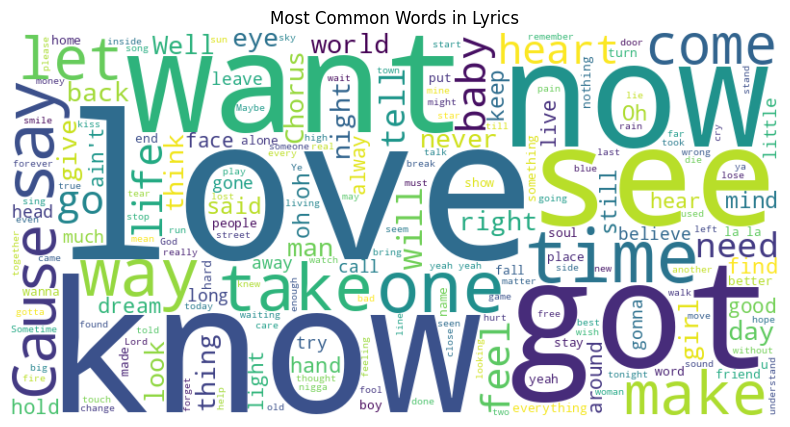

In [23]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

In [24]:


# download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stop_words = set(stopwords.words('english'))     

In [26]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)
     

In [27]:
# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [28]:
df.head()

,artist,song,text,cleaned_text
0,Iggy Pop,Hideaway,I need to touch \r\nA live unbeaten earth \r...,need touch live unbeaten earth thats im going ...
1,Ed Sheeran,Bloodstream,[Verse 1] \r\nI've been spinning now for time...,verse ive spinning time couple women side got ...
2,Gino Vannelli,Jehovah And All That Jazz,Hail to the shaman and his cardboard drum and ...,hail shaman cardboard drum riffraff dancing su...
3,Outkast,Funkin' Around,"ANDRE 3000: Hello, well good evening ladies an...",andre hello well good evening ladies gentlemen...
4,Yellowcard,"Rough Landing, Holly",Left the ground \r\nIn black and white \r\nA...,left ground black white plane went colors arou...


In [29]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [30]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [31]:
# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"   # can be reworked to compare for songs not present in the dataset
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]
     

In [32]:
# Example Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("For The First Time") # df["song"][2]
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
               artist                        song
8556      John Legend          For The First Time
6472  Ella Fitzgerald             Beginner's Luck
447           Roxette     For The Very First Time
9354      Leann Rimes          For The First Time
762      Cyndi Lauper  My First Night Without You
